In [13]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import scipy.ndimage

In [5]:
atmos = fits.open('./hinode_inversion_results/inv_res_mod.fits')[0].data

sir_labels = ['Optical Depth', 'Temperature (K)', 'Electron Pressure', 'Microturbulent Velocity', 'Magnetic Field Strength', '$V_{LOS}$', 'angle 1', 'angle 2']

In [6]:
# ok... magnetic field is indexes 4, 6, and 7

print(atmos.shape)
for i in (4, 6, 7):
    print(sir_labels[i])

(11, 61, 51, 51)
Magnetic Field Strength
angle 1
angle 2


In [25]:
atmos_new = np.empty(atmos.shape)
    
for z in range(atmos.shape[1]):
    for p in range(atmos.shape[0]):
        if p not in (4, 6, 7): # want to filter all the ones that are NOT magnetic...
            atmos_new[p, z] = scipy.ndimage.median_filter(atmos[p, z], size = 2)

        else:
            atmos_new[p, z] = atmos[p, z]

Text(0.5, 1.0, 'NEW, Magnetic Field Strength')

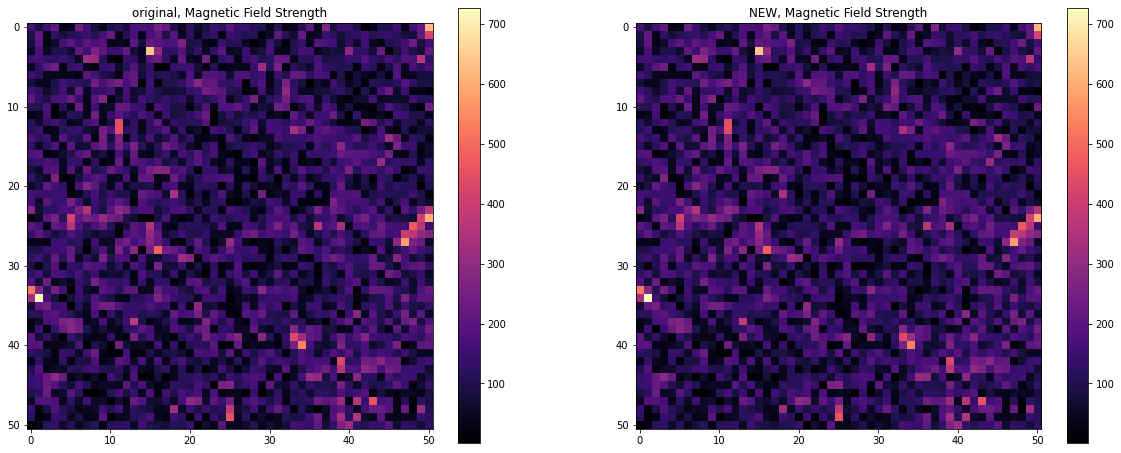

In [31]:
p = 4; z = 10

plt.figure(figsize = [20, 8])

plt.subplot(1,2,1)
plt.imshow(atmos[p, z], cmap = 'magma'); plt.colorbar()
plt.title('original, ' + sir_labels[p])

plt.subplot(1,2,2)
plt.imshow(atmos_new[p, z], cmap = 'magma'); plt.colorbar()
plt.title('NEW, ' + sir_labels[p])



In [27]:
fits.writeto('./hinode_inversion_results/inv_res_mod.fits', atmos_new, overwrite = True)


